In [ ]:
import sys
sys.path.append("/users/PAS0654/osu8354/root6_14_build/lib") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python2.7/site-packages")
import ROOT
import math
import numpy as np
from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib.pyplot as plt
from ROOT import TChain, TSelector, TTree
import os
import pickle
import pandas as csv

In [ ]:
file_list
for filename in os.listdir("/fs/project/PAS0654/ARA_DATA/A23/10pct_redo/ProcessedFile/A3/2013/"):#Loop over desired directory
    if filename.endswith("85_filter.root"): #extension, .root in this case
        print(os.path.join("/fs/project/PAS0654/ARA_DATA/A23/10pct_redo/ProcessedFile/A3/2013/", str(filename)))
        #run_number.append(filename.rsplit("_",2)[-2].split(".")[0])#Get run number
        file_list.append(os.path.join("/fs/project/PAS0654/ARA_DATA/A23/10pct_redo/ProcessedFile/A3/2013/", str(filename))) #add file name to the list

In [ ]:
run_number=np.array(run_number,float)

In [ ]:
chain = TChain("OutputTree") #Define chain and tree that needs to be read. 
for line in file_list:
    chain.AddFile(line) #Add files to chain

In [ ]:
unixTime=[]
isCalpulser=[]
for entry in chain:      
    unixTime.append(entry.unixTime)
    isCalpulser.append(entry.isCalpulser)

In [ ]:
plt.plot(unixTime,isCalpulser)

In [ ]:
plt.hist(run_number)

# Get ratio of calpulser to normal events per run

In [ ]:
run_number=[]
ratio_value=[]

for filename in os.listdir("/fs/project/PAS0654/ARA_DATA/A23/10pct_redo/ProcessedFile/A3/by_config/c5/"):#Loop over desired directory
    if filename.endswith("_filter.root"): #extension, .root in this case
        f = ROOT.TFile.Open(os.path.join("/fs/project/PAS0654/ARA_DATA/A23/10pct_redo/ProcessedFile/A3/by_config/c5/", str(filename)))
        numEntries=f.OutputTree.GetEntries()
        if numEntries==0:
            continue
        num_calpul=0
        for entry in f.OutputTree:
            if entry.isCalpulser>0:
                num_calpul+=1
        #print(num_calpul)
        run_number.append(int(filename.rsplit("_",2)[-2].split(".")[0]))#Get run number
        ratio_value.append(float(num_calpul/numEntries))
            
          

## Save to CSV file

In [ ]:
data = {'Run Number':run_number, "Ratio":ratio_value}
df = pd.DataFrame(data) 
df = df.sort_values(by=['Run Number'])
df = df[df["Ratio"]<=0.03]
df=df.round(3)
df.to_csv (r'/users/PCON0003/cond0068/ARA/AraRoot/analysis/a23_analysis_tools/A3_c5_untagged_calpul.csv', index = None, header=True)
#df

In [ ]:
plt.plot(run_number,ratio_value, "o", markersize=1)
# plt.xlim(1800,4000)
plt.ylabel("#calpulsers/#events")
plt.xlabel("Run number")
plt.title("Ratio of calpulser events to total events, c5")
plt.tight_layout()
#plt.xlim(1400,2000)
plt.savefig("calpulsers_c5.png", dpi=200)

# Get 2D plot of rms per run

In [ ]:
def isBadrun(runNum):
    colname=["run"]
    import pandas as pd
    badRunList=pd.read_csv("/users/PCON0003/cond0068/ARA/AraRoot/analysis/ARA_analysis/files/badRuns_list_A3.txt",names=colname)
    print((badRunList["run"]==runNum).any())

In [ ]:
isBadrun(11)

In [ ]:
colnames={'run_number': [],
 'rms_ch0': [],
 'rms_ch1': [],
 'rms_ch2': [],
 'rms_ch3': [],
 'rms_ch4': [],
 'rms_ch5': [],
 'rms_ch6': [],
 'rms_ch7': [],
 'rms_ch8': [],
 'rms_ch9': [],
 'rms_ch10': [],
 'rms_ch11': [],
 'rms_ch12': [],
 'rms_ch13': [],
 'rms_ch14': [],
 'rms_ch15': []}
# colnames=dict.fromkeys(["rms_ch{0}".format(x) for x in range(0,16)],[])

for filename in os.listdir("/fs/project/PAS0654/ARA_DATA/A23/10pct/other_studies/BasicInfo/A3/c2/"):#Loop over desired directory
    if filename.endswith("10.root"): #extension, .root in this case
        f = ROOT.TFile.Open(os.path.join("/fs/project/PAS0654/ARA_DATA/A23/10pct/other_studies/BasicInfo/A3/c2/", str(filename)))
        numEntries=f.outTree.GetEntries()
        if numEntries==0:
            continue
        if(f.outTree.runNum<3550 || f.outTree.runNum >4000):
            continue
        for entry in f.outTree:
            colnames["run_number"].append(f.outTree.runNum)
            for i in range(0,16):
                colnames["rms_ch{0}".format(i)].append(f.outTree.deepChannelRMS[i])
            
            
            
            
            
            

In [2]:
import pickle
%matplotlib inline

In [3]:
with open('../python_scripts/files/RMS_A3_c3.pickle', 'rb') as handle:
    colnames = pickle.load(handle)

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# plt.hist2d(colnames["run_number"],colnames['rms_ch0'],bins=[500,500],norm=mcolors.LogNorm())
# plt.colorbar()
# plt.title("Distribution of RMS values, A3/c1 (ch0)", fontsize=15)
# plt.xlim(1400,1910)
# plt.ylim(20,200)
# plt.xlabel("Run Number", fontsize=13)
# plt.ylabel("RMS [mV]", fontsize=13)
# # plt.savefig("/users/PCON0003/cond0068/ARA/rms_dist_A3_c1_ch0.png", dpi=200)

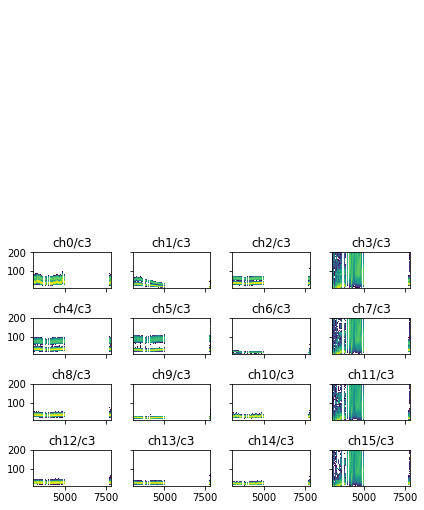

In [4]:
fig = plt.figure()

for i in range(0,16):
    ax = fig.add_subplot(4,4,i+1)
    ax.hist2d(colnames["run_number"],colnames["rms_ch{0}".format(i)],bins=[500,500],norm=mcolors.LogNorm())
#     ax.set_xlim(1400,1910)
    ax.set_ylim(10,200)
    ax.set_title("ch{0}/c3".format(i))
#     ax.colorbar(ax=ax)
    
for ax in fig.get_axes():
    ax.label_outer()
plt.tight_layout()
# fig.title("A3/c1")
plt.savefig("/users/PCON0003/cond0068/ARA/rms_dist_A3_c3.png", dpi=200)

# Get rate of soft triggers per run

In [ ]:
run_number=[]
ratio_value=[]
for filename in os.listdir("/fs/project/PAS0654/ARA_DATA/A23/10pct/other_studies/BasicInfo/A3/c2/"):#Loop over desired directory
    if filename.endswith(".root"): #extension, .root in this case
        f = ROOT.TFile.Open(os.path.join("/fs/project/PAS0654/ARA_DATA/A23/10pct/other_studies/BasicInfo/A3/c2/", str(filename)))
        numEntries=f.outTree.GetEntries()
#         print(f.outTree.runNum)
        if numEntries==0:
            continue
        f.outTree.GetEntry(0)
        if(f.outTree.isKnownBadRun)>0:
            continue
#         if(f.outTree.runNum<3550 or f.outTree.runNum >4000):
#             continue
        num_soft=0
        f.outTree.GetEntry(0)
        run_number.append(f.outTree.runNum)#Get run number
        for entry in f.outTree:
            if entry.isSoft>0:
                num_soft+=1
        #print(num_calpul)
        ratio_value.append(float(num_soft/numEntries))


In [ ]:
plt.scatter(run_number,ratio_value)
# plt.xlim(1400,2000)

In [ ]:
run_number